In [33]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

### constant

In [34]:
a = tf.constant(2)
b = tf.constant(3)
a,b

(<tf.Tensor 'Const_10:0' shape=() dtype=int32>,
 <tf.Tensor 'Const_11:0' shape=() dtype=int32>)

In [35]:
c = a + b
c

<tf.Tensor 'add_7:0' shape=() dtype=int32>

In [36]:
sess = tf.Session()
sess.run(c)

5

In [37]:
a1 = tf.constant([[3,3]])
a2 = tf.constant([[3],[3]])

In [38]:
tf.matmul(a1,a2)

<tf.Tensor 'MatMul_5:0' shape=(1, 1) dtype=int32>

In [39]:
sess.run(tf.matmul(a1,a2))

array([[18]])

### session

In [40]:
a = tf.constant(2)
b = tf.constant(3)
c = a+b
with tf.Session() as sess:
    print(sess.run(c))
    print(c.eval())

5
5


In [41]:
a = tf.constant(2)
b = tf.constant(3)
c = tf.add(a,b)
with tf.Session() as sess:
    print(sess.run(c))
    print(c.eval())
print(c)

5
5
Tensor("Add_9:0", shape=(), dtype=int32)


### variables

In [42]:
var1 = tf.Variable(100)
var1

<tf.Variable 'Variable_8:0' shape=() dtype=int32_ref>

In [43]:
var2 = tf.Variable(3)
var2

<tf.Variable 'Variable_9:0' shape=() dtype=int32_ref>

In [44]:
sum = tf.add(var1,var2)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(sum)

103

In [45]:
# this will not change value of the variable
var1.assign(1232)
sess.run(var1)

100

In [46]:
sess.run(var1.assign(1232))
sess.run(var1)

1232

In [47]:
sess.run(sum)

1235

### Placeholder

In [48]:
x = tf.placeholder(tf.int32)
y = x * tf.constant(12)
sess.run(y,feed_dict={x:10})

120

In [49]:
x = tf.placeholder(tf.int32,shape = (2,3))
y = x * tf.constant(12)
sess.run(y,feed_dict={x:[[1,2,3],[4,5,6]]})

array([[12, 24, 36],
       [48, 60, 72]])

# MNIST Data

In [66]:
from tensorflow.keras.datasets import mnist

In [67]:
data = mnist.load_data()
x_train = data[0][0]
y_train = data[0][1]
x_train = x_train.reshape(60000, 784)
from sklearn.preprocessing import OneHotEncoder
labels_array = y_train
encoder = OneHotEncoder()
labels_array_reshaped = labels_array.reshape(-1, 1)
encoded_array = encoder.fit_transform(labels_array_reshaped)
encoded_array_dense = encoded_array.toarray()
y_train = encoded_array_dense
x_train.shape , y_train.shape

((60000, 784), (60000, 10))

In [68]:
x_test = data[1][0]
y_test = data[1][1]
x_test = x_test.reshape(10000, 784)
from sklearn.preprocessing import OneHotEncoder
labels_array = y_test
encoder = OneHotEncoder()
labels_array_reshaped = labels_array.reshape(-1, 1)
encoded_array = encoder.fit_transform(labels_array_reshaped)
encoded_array_dense = encoded_array.toarray()
y_test = encoded_array_dense
x_test.shape , y_test.shape

((10000, 784), (10000, 10))

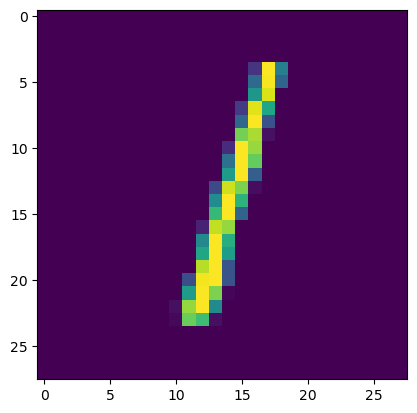

In [69]:
import numpy as np
from matplotlib import pyplot as plt
first_image = x_test[2]
first_image = np.array(first_image,dtype='float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

### Initializing weights and biases

In [70]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    "h1" : tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    "h2" : tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    "out": tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

biases = {
    "h1" : tf.Variable(tf.random_normal([n_hidden_1])),
    "h2" : tf.Variable(tf.random_normal([n_hidden_2])),
    "out": tf.Variable(tf.random_normal([n_classes]))
}

### forward propagation

In [71]:
def forward_propagation(x,weights,biases):
    in_layer1 = tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    out_layer1= tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
    return output

In [81]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
x = tf.placeholder(tf.int32,[None,n_input])
y = tf.placeholder(tf.int32,[None,n_classes])

#### Cost function

In [82]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred,labels=y))
sess.run(cost, feed_dict={x: x_train, y: y_train})

InvalidArgumentError: Graph execution error:

Detected at node 'Placeholder_2' defined at (most recent call last):
    File "C:\Users\yashw\New folder\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\yashw\New folder\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\yashw\New folder\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\yashw\New folder\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\yashw\New folder\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\yashw\New folder\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\yashw\New folder\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\yashw\New folder\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\yashw\AppData\Local\Temp\ipykernel_4460\2710431920.py", line 3, in <module>
      x = tf.placeholder(tf.float32,[None,n_input])
Node: 'Placeholder_2'
You must feed a value for placeholder tensor 'Placeholder_2' with dtype float and shape [?,784]
	 [[{{node Placeholder_2}}]]

Original stack trace for 'Placeholder_2':
  File "C:\Users\yashw\New folder\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\yashw\New folder\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\yashw\New folder\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\yashw\New folder\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\yashw\New folder\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\yashw\New folder\lib\asyncio\base_events.py", line 601, in run_forever
    self._run_once()
  File "C:\Users\yashw\New folder\lib\asyncio\base_events.py", line 1905, in _run_once
    handle._run()
  File "C:\Users\yashw\New folder\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
    await self.process_one()
  File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
    await dispatch(*args)
  File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
    await result
  File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
    reply_content = await reply_content
  File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
    res = shell.run_cell(
  File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
    return super().run_cell(*args, **kwargs)
  File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
    result = self._run_cell(
  File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
    result = runner(coro)
  File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
    if await self.run_code(code, result, async_=asy):
  File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\yashw\AppData\Local\Temp\ipykernel_4460\2710431920.py", line 3, in <module>
    x = tf.placeholder(tf.float32,[None,n_input])
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\ops\array_ops.py", line 3361, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 8693, in placeholder
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 795, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\framework\ops.py", line 3814, in _create_op_internal
    ret = Operation(


#### optimizer

In [84]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
optimize = optimizer.minimize(cost)
sess.run([optimize],feed_dict={x:x_train,y:y_train})

FailedPreconditionError: Graph execution error:

Detected at node 'beta1_power/read' defined at (most recent call last):
    File "C:\Users\yashw\New folder\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\yashw\New folder\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\yashw\New folder\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\yashw\New folder\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\yashw\New folder\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\yashw\New folder\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\yashw\New folder\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\yashw\New folder\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\yashw\AppData\Local\Temp\ipykernel_4460\3825576681.py", line 2, in <module>
      optimize = optimizer.minimize(cost)
Node: 'beta1_power/read'
Attempting to use uninitialized value beta1_power
	 [[{{node beta1_power/read}}]]

Original stack trace for 'beta1_power/read':
  File "C:\Users\yashw\New folder\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\yashw\New folder\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\yashw\New folder\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\yashw\New folder\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\yashw\New folder\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\yashw\New folder\lib\asyncio\base_events.py", line 601, in run_forever
    self._run_once()
  File "C:\Users\yashw\New folder\lib\asyncio\base_events.py", line 1905, in _run_once
    handle._run()
  File "C:\Users\yashw\New folder\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
    await self.process_one()
  File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
    await dispatch(*args)
  File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
    await result
  File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
    reply_content = await reply_content
  File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
    res = shell.run_cell(
  File "C:\Users\yashw\New folder\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
    return super().run_cell(*args, **kwargs)
  File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
    result = self._run_cell(
  File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
    result = runner(coro)
  File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
    if await self.run_code(code, result, async_=asy):
  File "C:\Users\yashw\New folder\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\yashw\AppData\Local\Temp\ipykernel_4460\3825576681.py", line 2, in <module>
    optimize = optimizer.minimize(cost)
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\training\optimizer.py", line 486, in minimize
    return self.apply_gradients(grads_and_vars, global_step=global_step,
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\training\optimizer.py", line 697, in apply_gradients
    self._create_slots(var_list)
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\training\adam.py", line 192, in _create_slots
    self._create_non_slot_variable(
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\training\optimizer.py", line 920, in _create_non_slot_variable
    v = variable_scope.variable(
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\ops\variables.py", line 285, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\ops\variables.py", line 226, in _variable_v1_call
    return previous_getter(
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\ops\variables.py", line 219, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2723, in default_variable_creator
    return variables.RefVariable(
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\ops\variables.py", line 289, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\ops\variables.py", line 1679, in __init__
    self._init_from_args(
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\ops\variables.py", line 1886, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\util\dispatch.py", line 1176, in op_dispatch_handler
    return dispatch_target(*args, **kwargs)
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\ops\array_ops.py", line 302, in identity
    ret = gen_array_ops.identity(input, name=name)
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 4898, in identity
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 795, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\yashw\New folder\lib\site-packages\tensorflow\python\framework\ops.py", line 3814, in _create_op_internal
    ret = Operation(


In [26]:
pred = forward_propagation(x,weights,biases)
predictions = tf.argmax(pred,1)
true_labels = tf.argmax(y,1)
correct_predictions = tf.equal(predictions,true_labels)

In [27]:
predictions_eval,labels,correct_pred_train = sess.run([predictions,true_labels,correct_predictions],feed_dict={x:x_train,y:y_train})
predictions_eval,labels,correct_pred_train

(array([9, 9, 6, ..., 5, 9, 2], dtype=int64),
 array([5, 0, 4, ..., 5, 6, 8], dtype=int64),
 array([False, False, False, ...,  True, False, False]))

In [28]:
correct_train = correct_pred_train.sum()
print(correct_train/600)
correct_train

11.778333333333334


7067

In [29]:
predictions_eval,labels,correct_pred_test = sess.run([predictions,true_labels,correct_predictions],feed_dict={x:x_test,y:y_test})
predictions_eval,labels,correct_pred_test

(array([2, 3, 5, ..., 2, 7, 9], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([False, False, False, ..., False, False, False]))

In [30]:
correct_test = correct_pred_test.sum()
print(correct_test/100)
correct_test

11.68


1168

In [ ]:
for i in range(25):
    c, _ = sess.run([cost,optimize], feed_dict = {x:x_train,y:y_train})